In [1]:
from sys import path
path.append('C:/Users/Noah/Documents/GitHub/THzCAI/vecap/')
import os
os.chdir('C:/Users/Noah/Desktop/WIP/test/')

In [2]:
import hadamard as hd

In [63]:
c = hd.Hadamard(4, 1024)

In [4]:
c.pre_start()

In [64]:
c.zva.write_data('mag')

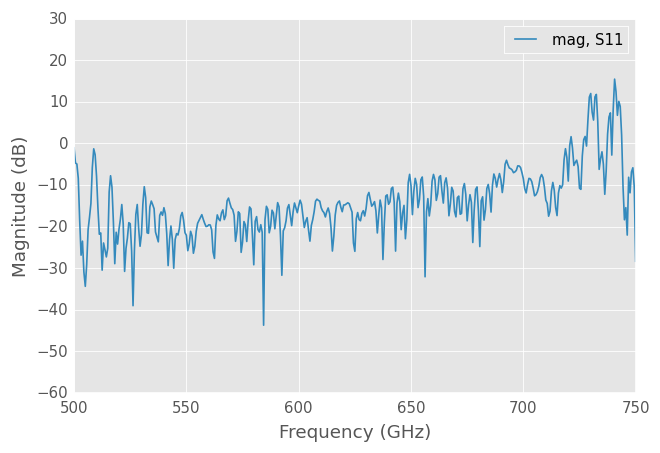

In [65]:
rf.Network('mag.s1p').plot_s_db()

In [9]:
c.esp.move(0.12)

In [10]:
c.zva.write_data('short')

C:\Anaconda\lib\site-packages\scikit_rf-0.14.1-py2.7.egg\skrf\vi\vna.py:1502: UserWarning: Retriving active trace is not functional. This is a stub.
  warn('Retriving active trace is not functional. This is a stub.')


In [11]:
ls

 Volume in drive C is Windows8_OS
 Volume Serial Number is 6C26-EC35

 Directory of C:\Users\Noah\Desktop\WIP\test

07/20/2015  02:43 PM    <DIR>          .
07/20/2015  02:43 PM    <DIR>          ..
07/20/2015  02:43 PM            13,844 short.s1p
               1 File(s)         13,844 bytes
               2 Dir(s)  849,672,368,128 bytes free


In [12]:
c.zva.write_data('delay_short')

In [13]:
ls

 Volume in drive C is Windows8_OS
 Volume Serial Number is 6C26-EC35

 Directory of C:\Users\Noah\Desktop\WIP\test

07/20/2015  02:44 PM    <DIR>          .
07/20/2015  02:44 PM    <DIR>          ..
07/20/2015  02:44 PM            13,792 delay_short.s1p
07/20/2015  02:43 PM            13,844 short.s1p
               2 File(s)         27,636 bytes
               2 Dir(s)  849,673,375,744 bytes free


In [14]:
c.zva.write_data('load')

In [15]:
pwd

u'C:\\Users\\Noah\\Desktop\\WIP\\test'

In [16]:
c.zva.write_data('blank_spaces')

In [17]:
c.zva.write_data('ds_1')

In [42]:
from skrf import RectangularWaveguide, OnePort,mil
import skrf as rf
meas = rf.ran()
freq = meas.values()[0].frequency

wg = RectangularWaveguide(frequency=freq,a = 1.5*10*mil,z0=50)


In [46]:
ds =wg.delay_short(152,'um',name='ds')
short = wg.short(name='short')
load = wg.match(name='load')

In [47]:
wg_cal = OnePort(ideals = [short, ds, load],
                 measured=[meas[k] for k in ['short','ds_152u','load']])

In [50]:
corrected = wg_cal.apply_cal_to_list(meas)

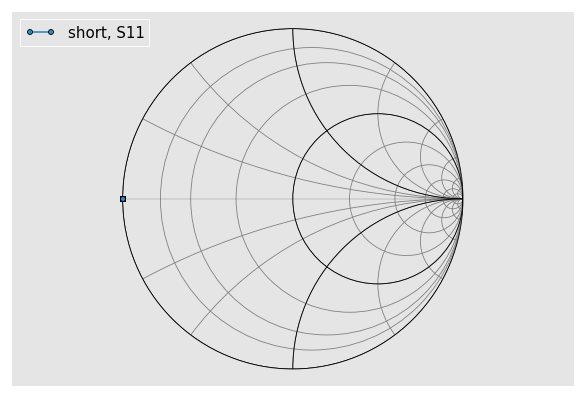

In [58]:
corrected['short'].plot_s_smith(marker='o')
rf.stylely()

In [59]:
wg_cal.error_ntwk.write_touchstone('wg_cal_error_ntwk')

In [60]:
ls

 Volume in drive C is Windows8_OS
 Volume Serial Number is 6C26-EC35

 Directory of C:\Users\Noah\Desktop\WIP\test

07/20/2015  03:05 PM    <DIR>          .
07/20/2015  03:05 PM    <DIR>          ..
07/20/2015  02:46 PM            14,301 blank_spaces.s1p
07/20/2015  02:44 PM            13,792 ds_152u.s1p
07/20/2015  02:47 PM            14,126 ds_1in.s1p
07/20/2015  02:45 PM            14,518 load.s1p
07/20/2015  02:43 PM            13,844 short.s1p
07/20/2015  03:05 PM            51,193 wg_cal_error_ntwk.s2p
               6 File(s)        121,774 bytes
               2 Dir(s)  849,676,902,400 bytes free


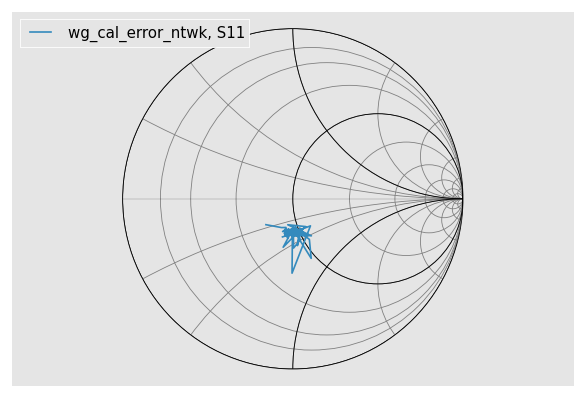

In [62]:
e = rf.Network('wg_cal_error_ntwk.s2p')
blank = rf.Network('blank_spaces.s1p')

c = e.inv ** blank
c.plot_s_smith()

In [66]:
zva = hd.Hadamard(4,1024)

In [69]:
zva.esp.position = 0

In [87]:
import time
for x in range (0,6):
    zva.esp.position = 0.04*(x)
    time.sleep(1)
    zva.zva.write_data('ds,'+str(x))

In [88]:
zva.esp.position = 0

In [75]:
from skrf.media import Freespace

In [78]:
zva.zva.write_data('match')

In [89]:
delta = 40
freq =rf.N('C:/Users/Noah/Desktop/WIP/test/ds,0.s1p').frequency
air = Freespace(frequency = freq, z0=50)
meas = rf.ran()
ideals = [ air.delay_short(k*delta,'um',name='ds,%i'%k) for k in range(6)] + [air.match(name = 'match')]
cal_q = rf.OnePort(measured = meas, ideals = ideals, 
                 sloppy_input=True, is_reciprocal=False)

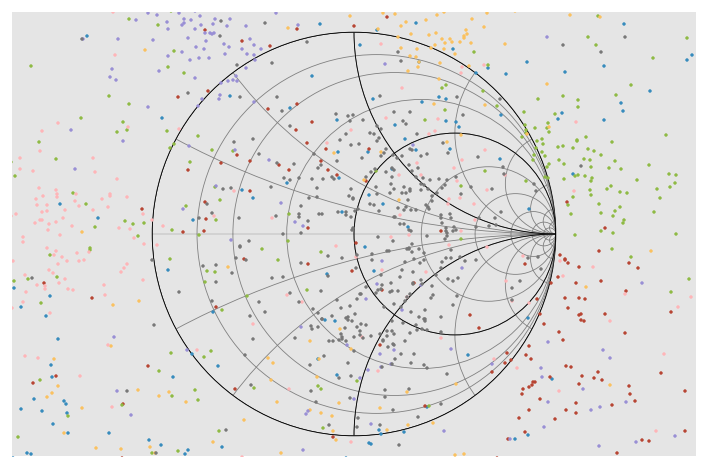

In [90]:
cal_q.plot_caled_ntwks(ls='', marker='.')